In [24]:
! pip install torch

In [0]:
%matplotlib inline

In [0]:
import math
import random
import numpy as np
from numpy import linalg as LA


In [27]:
randn  = np.random.normal(size=(10000,2))
angles = np.arctan2( randn[:,0], randn[:,1] )
magnit = LA.norm( randn, ord=2, axis=-1 )
labels = magnit > 1.0


quadrant1 = randn[ np.logical_and(0 < angles, angles < math.pi/2.0),:]
angles1   = angles[  np.logical_and(0 < angles, angles < math.pi/2.0) ]
labels1   = labels[  np.logical_and(0 < angles, angles < math.pi/2.0) ].astype('int').reshape(-1,1)
domain1   = 0*np.ones(labels1.shape, dtype=int)

quadrant2 = randn[ np.logical_and(math.pi/2.0 < angles, angles < math.pi),:]
angles2   = angles[ np.logical_and(math.pi/2.0 < angles, angles < math.pi) ]
labels2   = labels[ np.logical_and(math.pi/2.0 < angles, angles < math.pi) ].astype('int').reshape(-1,1)
domain2   = 1*np.ones(labels2.shape, dtype=int)

quadrant3 = randn[ np.logical_and(-1*math.pi/2.0 > angles, angles > -1*math.pi),:]
angles3   = angles[ np.logical_and(-1*math.pi/2.0 > angles, angles > -1*math.pi) ]
labels3   = labels[ np.logical_and(-1*math.pi/2.0 > angles, angles > -1*math.pi) ].astype('int').reshape(-1,1)
domain3   = 2*np.ones(labels3.shape, dtype=int)

quadrant4 = randn[ np.logical_and(0 > angles, angles > -1*math.pi/2.0),:]
angles4   = angles[ np.logical_and(0 > angles, angles > -1*math.pi/2.0) ]
labels4   = labels[ np.logical_and(0 > angles, angles > -1*math.pi/2.0) ].astype('int').reshape(-1,1)
domain4   = 3*np.ones(labels4.shape, dtype=int)




x = np.linspace(-5,5)
y = np.linspace(-5,5)
X, Y = np.meshgrid(x,y)

GRID = np.vstack( (X.flatten(),Y.flatten()) ).transpose()

print(GRID)
LABELS = LA.norm( GRID, ord=2, axis=-1 ) > 2.0
LABELS = LABELS.astype('int').reshape(-1,1)





[[-5.         -5.        ]
 [-4.79591837 -5.        ]
 [-4.59183673 -5.        ]
 ...
 [ 4.59183673  5.        ]
 [ 4.79591837  5.        ]
 [ 5.          5.        ]]


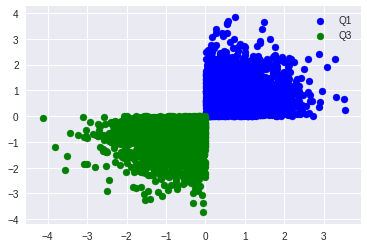

In [28]:
from matplotlib import pyplot as plt

plt.scatter(quadrant1[:,0],quadrant1[:,1],c="b",label='Q1')
#plt.scatter(quadrant2[:,0],quadrant2[:,1],c="r",label='Q2')
plt.scatter(quadrant3[:,0],quadrant3[:,1],c="g",label='Q3')
#plt.scatter(quadrant4[:,0],quadrant4[:,1],c="m",label='Q4')
plt.legend()
plt.show()

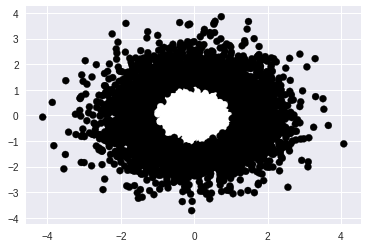

In [29]:
from matplotlib import pyplot as plt

plt.scatter(quadrant1[:,0],quadrant1[:,1],c=labels1.reshape((-1,)))
plt.scatter(quadrant2[:,0],quadrant2[:,1],c=labels2.reshape((-1,)))
plt.scatter(quadrant3[:,0],quadrant3[:,1],c=labels3.reshape((-1,)))
plt.scatter(quadrant4[:,0],quadrant4[:,1],c=labels4.reshape((-1,)))

plt.show()

In [0]:

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable

batch_size  = 1024
hidden_size = 64

In [0]:
from torch.utils.data import TensorDataset, DataLoader

train_set = TensorDataset(torch.from_numpy(quadrant1).float(), torch.from_numpy(labels1))
valid_set = TensorDataset(torch.from_numpy(GRID).float(), torch.from_numpy(LABELS))


train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_set, batch_size=batch_size)


In [32]:
class SimpleClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.sig    = nn.Sigmoid()
        
        self.layer1 = nn.Linear(2,hidden_size)
        self.layer2 = nn.Linear(hidden_size,hidden_size)
        self.layer3 = nn.Linear(hidden_size,hidden_size)
        
        self.decision = nn.Linear(hidden_size,2)
    
    def forward(self, coord):
        h = self.layer1(coord)
        h = self.sig(h)
        h = self.layer2(h)
        h = self.sig(h)
        h = self.layer3(h)
        h = self.sig(h)
        out = self.decision(h)
        return out

simple_model = SimpleClassifier()
simple_model

SimpleClassifier(
  (sig): Sigmoid()
  (layer1): Linear(in_features=2, out_features=64, bias=True)
  (layer2): Linear(in_features=64, out_features=64, bias=True)
  (layer3): Linear(in_features=64, out_features=64, bias=True)
  (decision): Linear(in_features=64, out_features=2, bias=True)
)

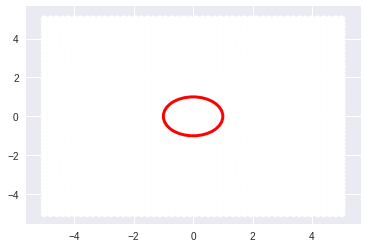

In [33]:
  
def plot_mesh(model, loader):
    fig, ax = plt.subplots()
    model.eval()
    for x, y in loader:
        y_scores = model(Variable(x))
        y_pred = torch.max(y_scores, 1)[1]
        points = ax.scatter( x.numpy()[:,0], x.numpy()[:,1], c=y_pred.numpy(), animated=True )
          
    circle = plt.Circle((0,0), 1.0, color='r', fill=False, lw=3)
    ax.add_artist(circle)
    plt.show()
        
plot_mesh(simple_model, valid_loader)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  if __name__ == '__main__':


0 tensor(0.0008) tensor(0.0006) 1.0006319496335123 797.7024
50 tensor(0.0002) tensor(0.0036) 1.0036121301746108 331.288
100 tensor(0.0001) tensor(0.0048) 1.0048523194951524 333.8896
150 tensor(0.0001) tensor(0.0050) 1.0050274424239583 334.432
200 tensor(0.0001) tensor(0.0050) 1.0050344671641214 339.5392
250 tensor(0.0001) tensor(0.0051) 1.0051047570495755 342.3696
300 tensor(0.0001) tensor(0.0052) 1.0052493360764054 350.4016
350 tensor(9.2336e-05) tensor(0.0056) 1.0055727840733346 357.6624
400 tensor(6.9633e-05) tensor(0.0061) 1.0060833528348145 369.3248
450 tensor(4.6933e-05) tensor(0.0068) 1.0067728369900377 380.8064
500 tensor(3.4492e-05) tensor(0.0075) 1.0075741845315989 385.9104
550 tensor(2.7954e-05) tensor(0.0083) 1.0083583323572565 389.1648
600 tensor(2.5075e-05) tensor(0.0090) 1.0090498468753597 390.1024
650 tensor(2.0802e-05) tensor(0.0096) 1.0096740090632002 389.976
700 tensor(1.7115e-05) tensor(0.0102) 1.01023569871829 389.5744
750 tensor(1.7240e-05) tensor(0.0107) 1.010728

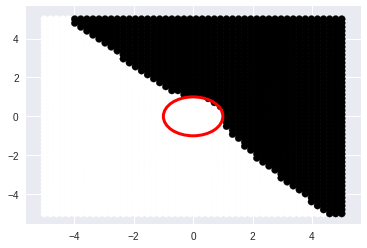

In [34]:
def perf(model, loader):
    criterion = nn.CrossEntropyLoss()
    model.eval()
    total_loss = num = oks = 0
    for x, y in loader:
        y_scores = model(Variable(x))
        y_pred = torch.max(y_scores, 1)[1]
        
        loss = criterion(y_scores.view(y.size(0) * y.size(1), -1), Variable(y.view(y.size(0) * y.size(1)), volatile=True))
        total_loss += loss.data
        num += len(y)
        oks += torch.sum((y_pred.data == y))
        
    return total_loss / num, math.exp(total_loss / num), float(oks)/float(num)
   

def fit(model, epochs):
    animation_data = []
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters())
    for epoch in range(epochs):
        model.train()
        total_loss = num = 0
        
        for x, y in train_loader:
            optimizer.zero_grad()
            y_scores = model(Variable(x))
            loss = criterion(y_scores.view(y.size(0) * y.size(1), -1), Variable(y.view(y.size(0) * y.size(1))))
            loss.backward()
            optimizer.step()
            total_loss += loss.data
            num += len(y)
            
        if(epoch%50 == 0):
            print(epoch, total_loss / num, *perf(model, valid_loader))

        
fit(simple_model, 5000)
plot_mesh(simple_model, valid_loader)

In [35]:
from torch.autograd import Function

class GradReverse(Function):
    @staticmethod
    def forward(ctx, x):
        return x.view_as(x)

    @staticmethod
    def backward(ctx, grad_output):
        return grad_output.neg()

def grad_reverse(x):
    return GradReverse.apply(x)
  
  

class AdversarialClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.sig    = nn.Sigmoid()
        
        self.layer1 = nn.Linear(2,hidden_size)
        self.layer2 = nn.Linear(hidden_size,hidden_size)
        self.layer3 = nn.Linear(hidden_size,hidden_size)
        
        self.decision = nn.Linear(hidden_size,2)
        self.adversarial = nn.Linear(hidden_size,4)
    
    def forward(self, coord):
        h = self.layer1(coord)
        h = self.sig(h)
        h = self.layer2(h)
        h = self.sig(h)
        h = self.layer3(h)
        h = self.sig(h)
        
        out = self.decision(h)
        
        adv = grad_reverse(h)
        adv = self.adversarial(adv)
        
        return out, adv

adversarial_model = AdversarialClassifier()
adversarial_model

AdversarialClassifier(
  (sig): Sigmoid()
  (layer1): Linear(in_features=2, out_features=64, bias=True)
  (layer2): Linear(in_features=64, out_features=64, bias=True)
  (layer3): Linear(in_features=64, out_features=64, bias=True)
  (decision): Linear(in_features=64, out_features=2, bias=True)
  (adversarial): Linear(in_features=64, out_features=4, bias=True)
)

In [0]:
adv_source_train_set = TensorDataset(torch.from_numpy(quadrant1).float(), torch.from_numpy(labels1), torch.from_numpy(domain1))
adv_target_train_set = TensorDataset(torch.from_numpy( np.vstack((quadrant2,quadrant3,quadrant4))).float(), torch.from_numpy( np.vstack((domain2,domain3,domain4))))


source_loader = DataLoader(adv_source_train_set, batch_size=batch_size, shuffle=True)
target_loader = DataLoader(adv_target_train_set, batch_size=batch_size, shuffle=True)



In [42]:

def perf_adv(model, loader):
    criterion = nn.CrossEntropyLoss()
    model.eval()
    total_loss = num = oks = 0
    for x, y in loader:
        y_scores, _ = model(Variable(x))
        y_pred = torch.max(y_scores, 1)[1]
        
        loss = criterion(y_scores.view(y.size(0) * y.size(1), -1), Variable(y.view(y.size(0) * y.size(1)), volatile=True))
        total_loss += loss.data
        num += len(y)
        oks += torch.sum((y_pred.data == y))
        
    return total_loss / num, float(oks)/float(num)
  
  

def fit_adv(model, epochs):
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.Adam(model.parameters())
  target_loader_epoch = iter(target_loader)
  
  for epoch in range(epochs):
    
    model.train()
    total_loss = num = 0
    # iterate over batches
    for (xs, ys, d1) in source_loader:
        
      optimizer.zero_grad()
      # update lambda and learning rate to ensure stability
      p = float(epoch) / epochs
      lambd = 2. / (1. + np.exp(-5. * p)) - 1
        
      # exit if batch size incorrect, get next target batch
      if len(xs) < batch_size:
        continue
        
      xt, d2 = next(target_loader_epoch)
      if len(xt) < batch_size:
        target_loader_epoch = iter(target_loader)
        continue      
      
      y_scores, adv_d1 = model(xs)
      _, adv_d2 = model(xt)
      
      main_loss = criterion(y_scores.view(ys.size(0) * ys.size(1), -1), Variable(ys.view(ys.size(0) * ys.size(1))))
      adv_loss1 = criterion(adv_d1.view(d1.size(0) * d1.size(1), -1), Variable(d1.view(d1.size(0) * d1.size(1))))
      adv_loss2 = criterion(adv_d2.view(d2.size(0) * d2.size(1), -1), Variable(d2.view(d2.size(0) * d2.size(1))))
      
      loss = main_loss + lambd*(adv_loss1+adv_loss2)
      loss.backward()
      optimizer.step()
      total_loss += loss.data
      num += len(ys)
    if(epoch%50 == 0):
      print(epoch, lambd, total_loss / num, *perf_adv(model, valid_loader))      
      
      
fit_adv(adversarial_model, 5000)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  # Remove the CWD from sys.path while we load stuff.


0 0.0 tensor(1.1605e-05) tensor(0.0104) 468.8944
50 0.024994792968420665 tensor(5.6955e-05) tensor(0.0107) 469.1152
100 0.049958374957880025 tensor(0.0001) tensor(0.0110) 469.6944
150 0.0748596906874992 tensor(0.0002) tensor(0.0112) 469.4736
200 0.0996679946249559 tensor(0.0002) tensor(0.0113) 468.4528
250 0.12435300177159614 tensor(0.0003) tensor(0.0113) 468.6736
300 0.14888503362331806 tensor(0.0003) tensor(0.0113) 468.8112
350 0.17323515783466026 tensor(0.0004) tensor(0.0114) 468.8112
400 0.197375320224904 tensor(0.0004) tensor(0.0113) 469.1696
450 0.22127846789844408 tensor(0.0005) tensor(0.0113) 468.9488
500 0.2449186624037092 tensor(0.0005) tensor(0.0114) 468.9488
550 0.2682711820216015 tensor(0.0006) tensor(0.0115) 469.1696
600 0.2913126124515908 tensor(0.0006) tensor(0.0115) 469.1696
650 0.31402092534699766 tensor(0.0007) tensor(0.0115) 469.1696
700 0.3363755443363323 tensor(0.0007) tensor(0.0114) 469.1696
750 0.35835739835078595 tensor(0.0008) tensor(0.0114) 468.9488
800 0.379

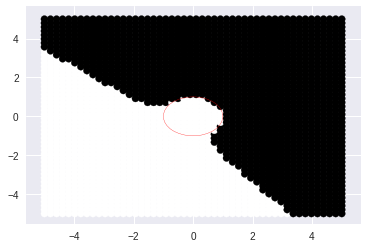

In [41]:
def plot_adv_mesh(model, loader):
  
    fig, ax = plt.subplots()
    model.eval()
    for x, y in loader:
        y_scores, _ = model(Variable(x))
        y_pred = torch.max(y_scores, 1)[1]
        ax.scatter( x.numpy()[:,0], x.numpy()[:,1], c=y_pred.numpy() )
        
        
    
    circle = plt.Circle((0,0), 1.0, color='r', fill=False)
    ax.add_artist(circle)
    plt.show()

plot_adv_mesh(adversarial_model, valid_loader)

# Excercise

Etudiéz l'impact de l'adversarial learning lorsqu'on apprend nos modèle sur les données dans Q1 et Q3
et sur Q1 et Q2 ?

Et lorsqu'on considere seulement deux domaines?
C'est-à-dire Q1 est un domaine, mais Q2, Q3, Q4 sont mis ensemble